# Data

In [1]:
import numpy as np
import seaborn as sns
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = "/home/emili/Documents/Universitat/TFG/cv-gender-age-recognition/data/body"
data = {'Gender':[], 'Age':[]}
for seq in [s for s in os.listdir(root) if "MOT" in s and len(s.split("-"))==2]:
    with open(os.path.join(root, seq, "annotations/curated.json"), 'r') as curated:
        for _,item in json.load(curated).items():
            for sample in item:
                # data['Gender'].append(sample['gender'])
                # data['Age'].append(sample['age'])
                data['Gender'].append("Man" if sample['gender'] else "Woman")
                data['Age'].append({0:"Young", 1:"Adult", 2:"Old"}[sample['age']])

df = pd.DataFrame(data)
df.head()

,Gender,Age
0,Man,Old
1,Man,Adult
2,Woman,Adult
3,Man,Adult
4,Woman,Old


In [3]:
counts = []
for age in np.unique(df['Age']):
    for gender in np.unique(df['Gender']):
        counts.append({'Age':age, 'Gender':gender, 'Count':df.value_counts(["Gender", "Age"])[gender][age]})
df_cts = pd.DataFrame(counts)
df_cts

,Age,Gender,Count
0,Adult,Man,2935
1,Adult,Woman,2214
2,Old,Man,267
3,Old,Woman,830
4,Young,Man,257
5,Young,Woman,178


In [7]:
df.value_counts(['Age', 'Gender'])['Old']['Woman']/df.value_counts(['Age', 'Gender'])['Old']['Man']

3.108614232209738

In [ ]:
coocurrence_matrix = np.zeros((2, 3), dtype=int)
for gender, age in zip(data['Gender'], data['Age']):
    coocurrence_matrix[gender, age] += 1
coocurrence_matrix

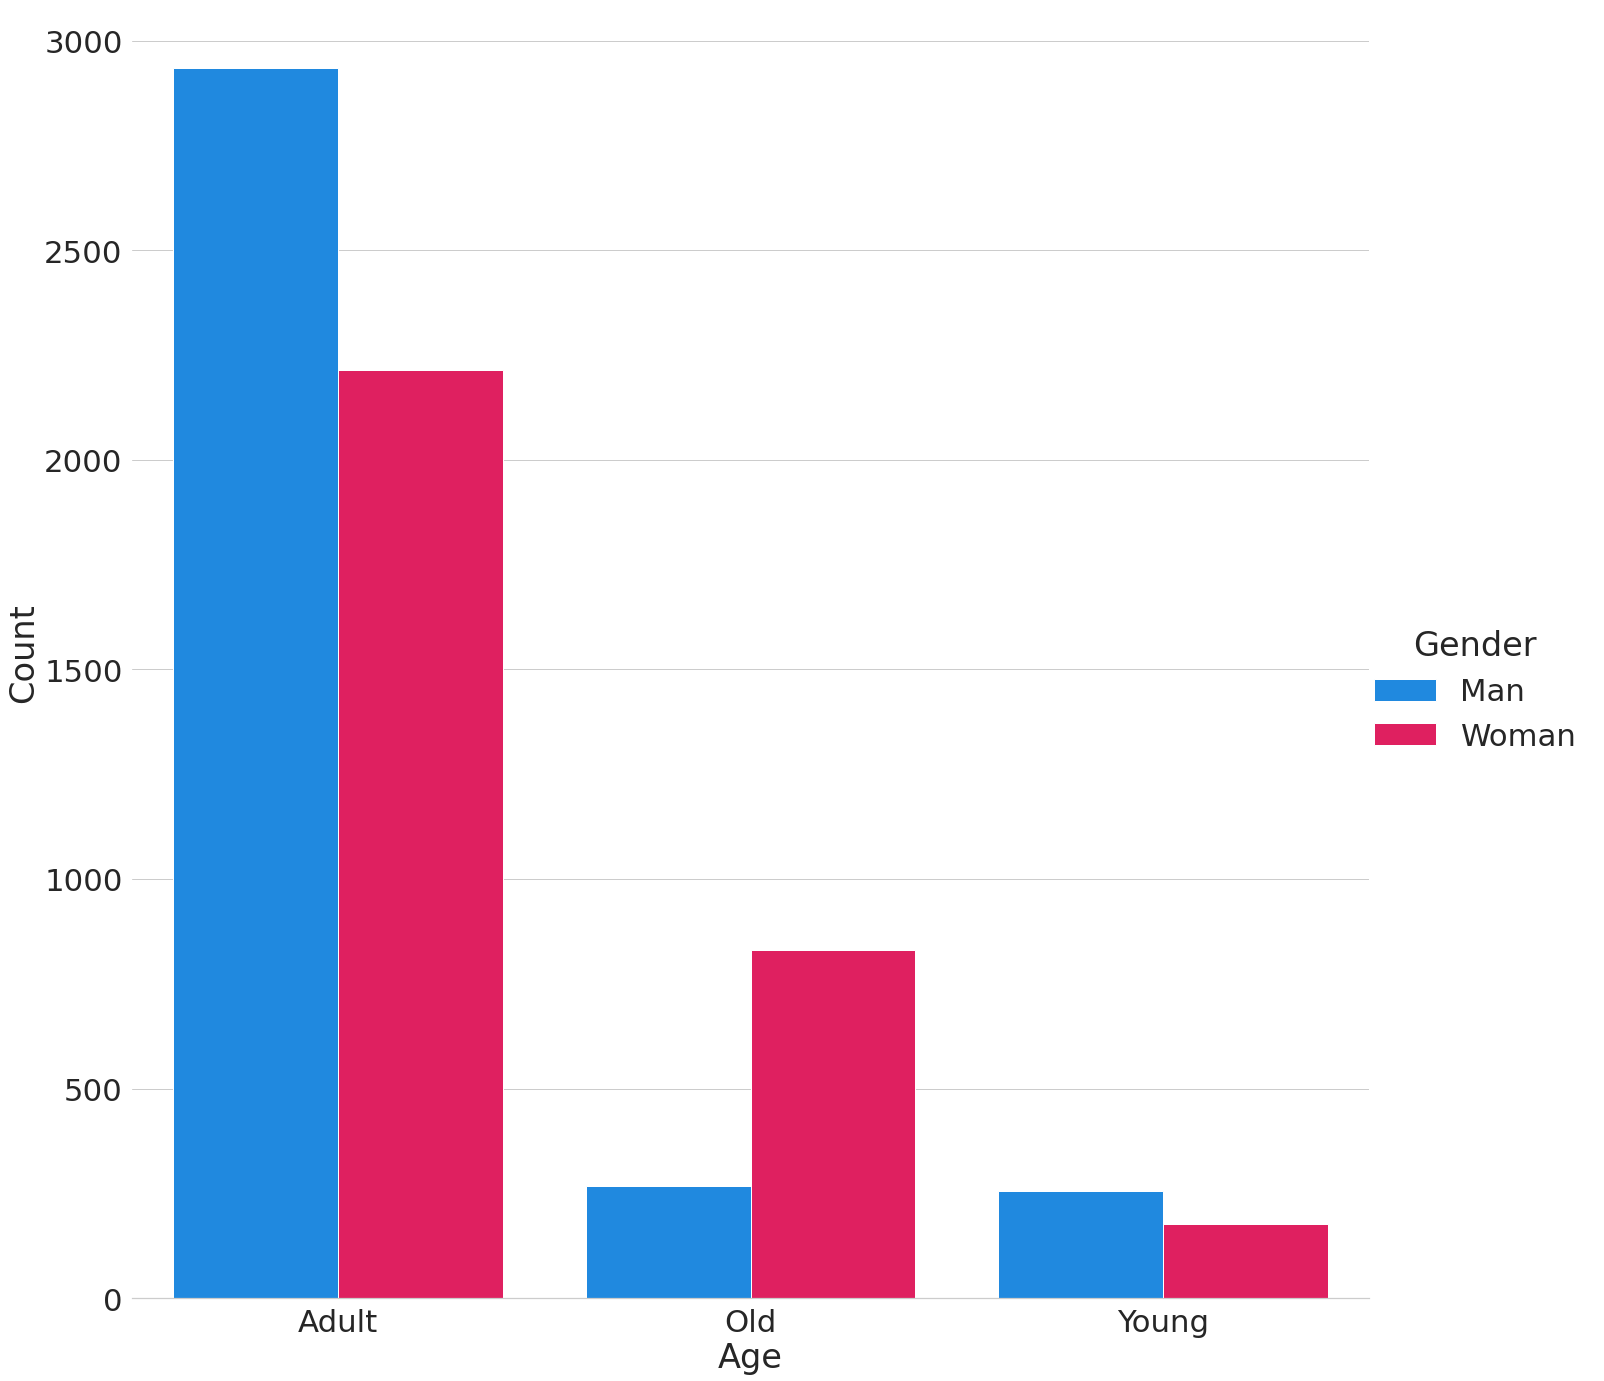

In [120]:
import seaborn as sns
sns.set_theme(style="whitegrid")



customPalette = sns.set_palette(sns.color_palette(["#008cff", "#ff0055"]))


sns.set_theme(style="whitegrid", font_scale=2.8, palette=customPalette)
g = sns.catplot(
    data=df_cts, kind="bar",
    x="Age", y="Count", hue="Gender",
    ci="sd", alpha=1, height=20, 
)
g.despine(left=True)

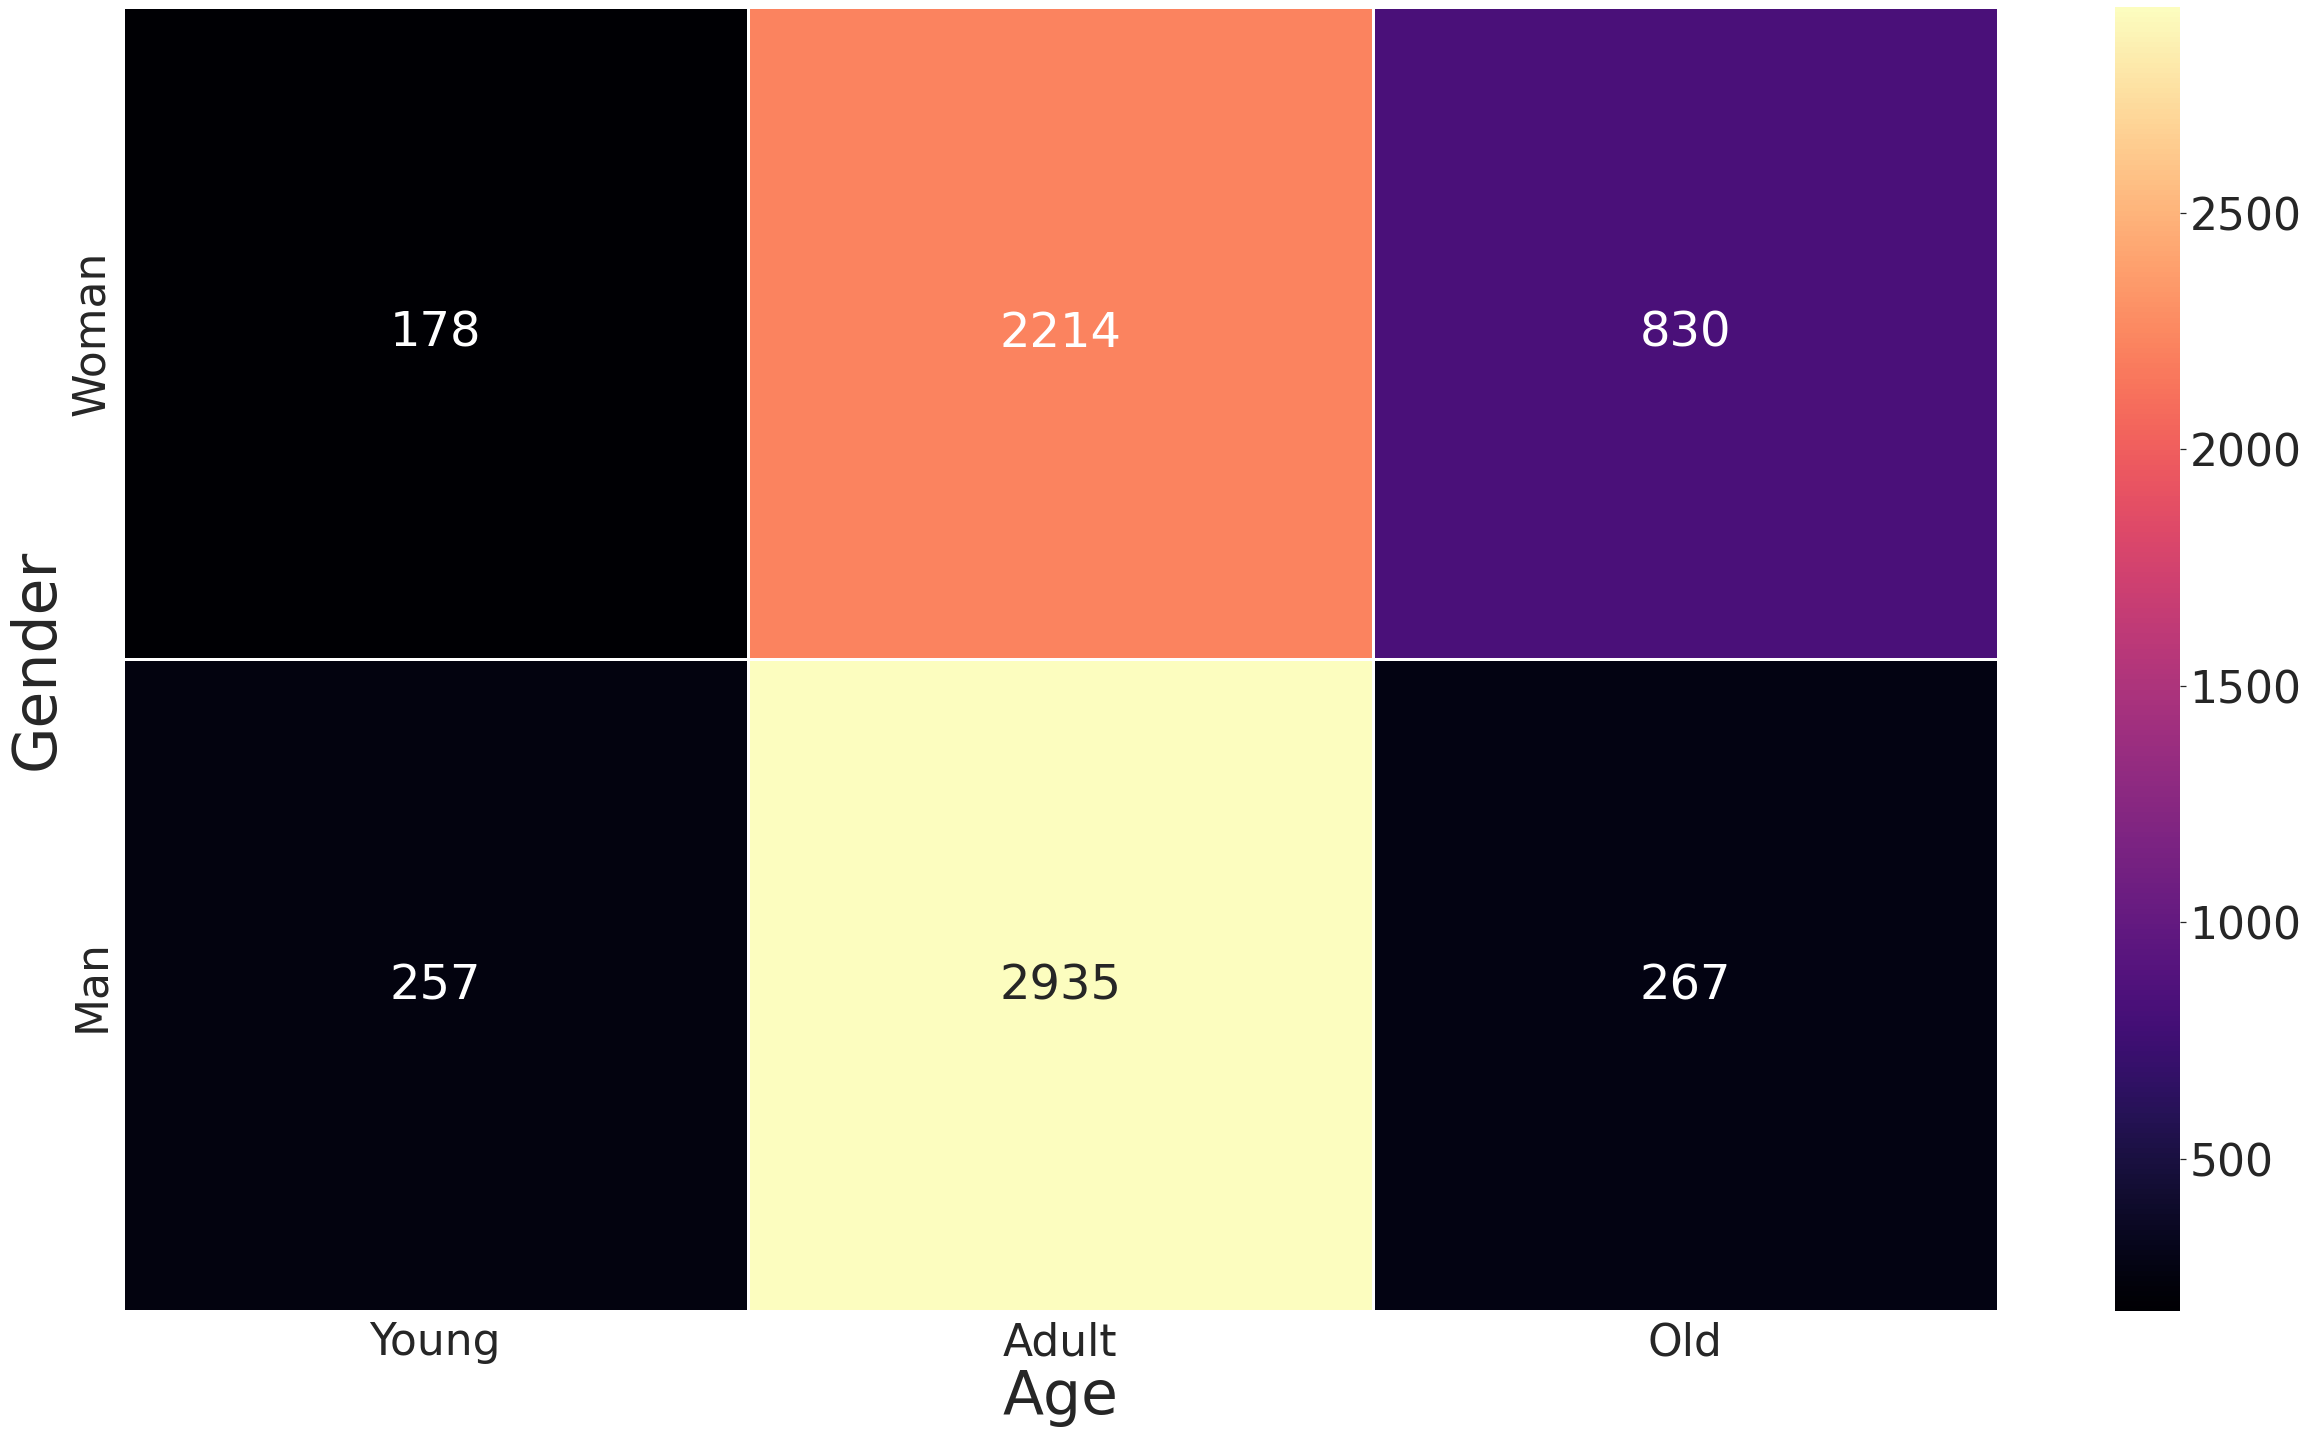

In [299]:
plt.rcParams["figure.figsize"] = (14*3, 8*3)
sns.set(font_scale=4)
plot = sns.heatmap(coocurrence_matrix, linewidths=3, annot=True, fmt='g', annot_kws={"size": 12*4}, cmap="magma")
# plt.title("Co-ocurrence frequencies between gender and age classes", fontsize=20)
plt.xlabel('Age', fontsize = 60)
plot.set_yticklabels(['Woman', 'Man'])
plt.ylabel('Gender', fontsize = 60)
plot.set_xticklabels(['Young', 'Adult', 'Old'])
plt.show()

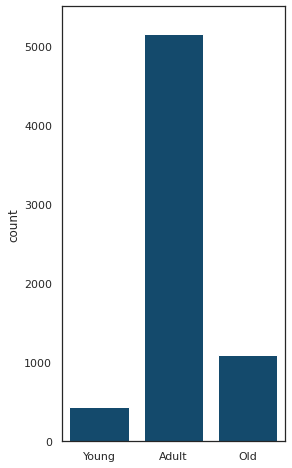

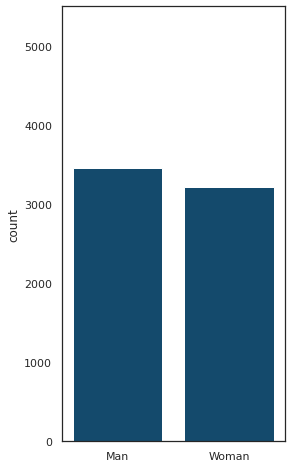

In [181]:
sns.set(style='white')
plt.rcParams["figure.figsize"] = (4, 8)
age_hist = sns.countplot(data=data, x='Age', color="#064e7a", order=['Young', 'Adult', 'Old'])
plt.ylim(0, 5500)
plt.show()

age_hist = sns.countplot(data=data, x='Gender', color="#064e7a", order=['Man', 'Woman'])
plt.ylim(0, 5500)
plt.show()

In [153]:
gender_counts = pd.DataFrame([{'Gender':gender, 'Count': sum(df.value_counts()[gender])} for gender in ['Man', 'Woman']])
gender_counts

,Gender,Count
0,Man,3459
1,Woman,3222


In [251]:
import plotly.graph_objects as go
labels = gender_counts['Gender']
values = gender_counts['Count']

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_traces(marker=dict(colors=["#008cff", "#ff0055"], line=dict(color='#FFFFFF', width=5)))
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    width=1000,
    height=1000,
    font=dict(
        family="Times New Roman",
        size=30,
        color="Black"
    )
)
fig.show()

In [241]:
import plotly.express as px
print(df['Gender'].value_counts())
fig = px.pie(data, values=df['Gender'].value_counts(), names=['Man', 'Woman'],
             hole=.5, color_discrete_sequence=["#008cff", "#ff0055"])
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    width=800,
    height=800,
    font=dict(
        family="Times New Roman",
        size=23,
        color="Black"
    )
)
fig.show()

Man      3459
Woman    3222
Name: Gender, dtype: int64


In [239]:
print(df['Age'].value_counts())
fig = px.pie(data, names='Age', hole=.5,
            color_discrete_sequence=["#1CB8FF", "#FFAE1C  ", "#B8FF1C"])
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    width=800,
    height=800,
    font=dict(
        family="Times New Roman",
        size=23,
        color="Black"
    )
)
fig.show()

Adult    5149
Old      1097
Young     435
Name: Age, dtype: int64


5149

In [220]:
age_counts = pd.DataFrame([{'Age':age, 'Count': df.groupby('Age').size()[age]} for age in ['Young', 'Adult', 'Old']])
age_counts

,Age,Count
0,Young,435
1,Adult,5149
2,Old,1097


In [250]:
import plotly.graph_objects as go
labels = age_counts['Age']
values = age_counts['Count']

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_traces(marker=dict(colors=["#1CB8FF", "#FFAE1C  ", "#B8FF1C"], line=dict(color='#FFFFFF', width=5)))
fig.update_layout(
    margin=dict(t=0, b=0, l=0, r=0),
    width=1000,
    height=1000,
    font=dict(
        family="Times New Roman",
        size=30,
        color="Black"
    )
)
fig.show()

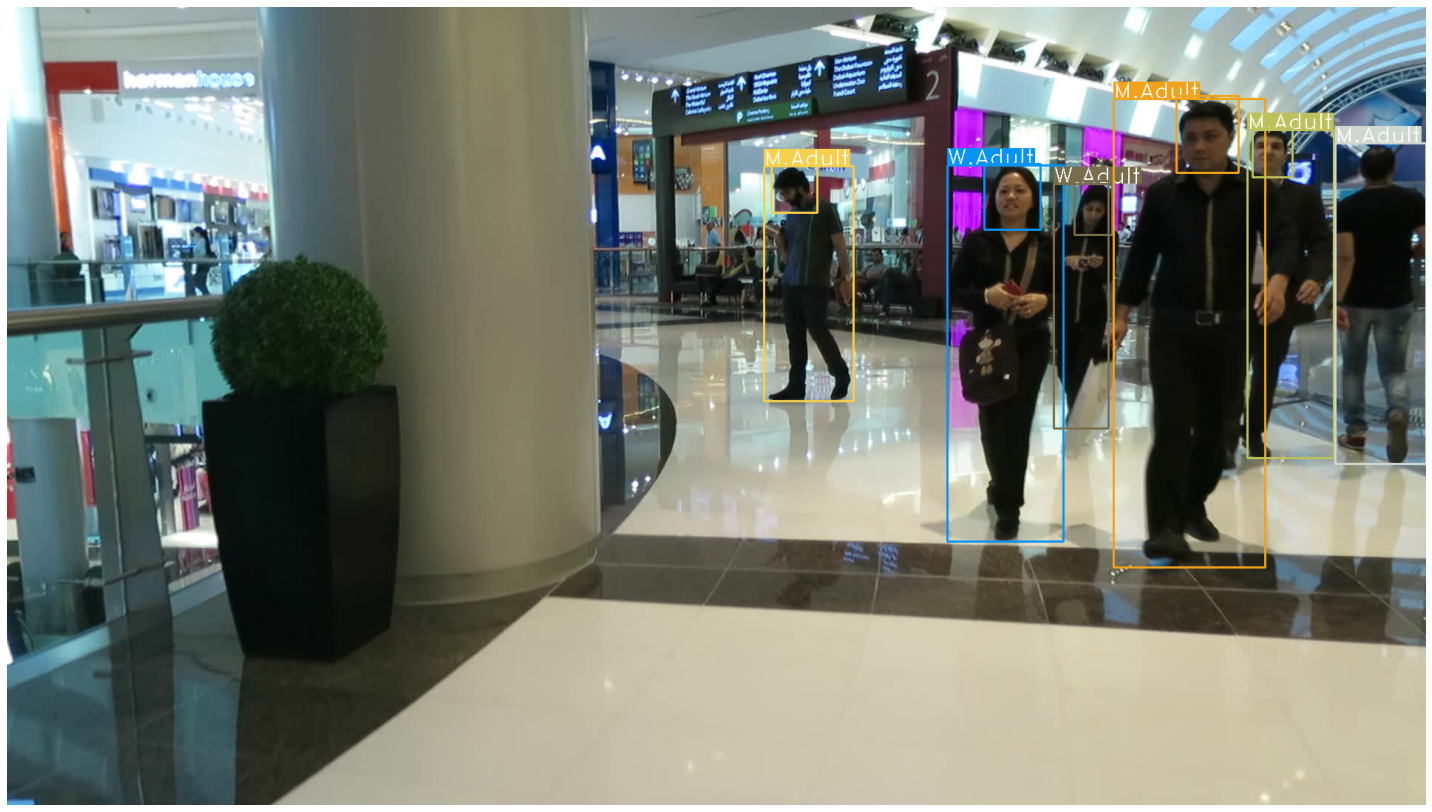

In [3]:
import json
import utils


def pred2ann(preds):
    if not len(preds):
        return None
    if "bbox" in preds[0].keys():
        return [{'bbox':p['bbox'], 'age':f"{np.argmax(p['age'])+1}({len(p['age'])})", 'gender':f"{'Man' if round(p['gender']) else 'Woman'}"} for p in preds]
    else:
        assert("bbb" in preds[0].keys() and "fbb" in preds[0].keys())
        age_dict = {0:"Young", 1:"Adult", 2:"Old"}
        return [{'bbb':p['bbb'], 'fbb':p['fbb'], 'age':age_dict[p['age']], 'gender':f"{'Man' if round(p['gender']) else 'Woman'}"} for p in preds]


path = "/home/emili/Documents/Universitat/TFG/cv-gender-age-recognition/data/body/MOT17-12/annotations/curated.json"
with open(path, "r") as curated:
    ann = json.load(curated)
    for i,imgpath in enumerate(ann):
        utils.show(utils.draw_annotation(imgpath, pred2ann(ann[imgpath])), cformat="bgr", size=(20, 20))
        if i == 0:
            break

In [2]:
import plotly.graph_objects as go

top_labels = ['Training', 'Validation', 'Testing']

colors = ['#5ae065', '#34b7eb', '#ba34eb', '#5ae065', '#34b7eb', '#ba34eb']

x_data = [[4459, 1272, 941],  # fold 4
          [4313, 1418, 941],  # fold 3
          [4495, 1236, 941],  # fold 2
          [4926, 805, 941]]   # fold 1
x_data = [[round(value/sum(bar)*100, 2) for value in bar] for bar in x_data]

y_data = ['Fold 4',
          'Fold 3',
          'Fold 2',
          'Fold 1']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(255, 255, 255)', width=1)
            )
        ))


annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(255, 255, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(255, 255, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]


fig.update_layout(annotations=annotations)
fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(255, 255, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    font=dict(
        family="Times New Roman",
        size=30,
        color="Black"
    ),
    showlegend=False
)


fig.show()

### Effective Range

In [2]:
def getRangeValues(ranges):
    return [ranges['close'], ranges['mid'], ranges['long']]

In [18]:
acc_per_range = {
        'age': {
                'close': 1.0,
                'long': 0.6789037037037037+0.1,
                'mid': 0.8354593301435407+0.05},
        'gender': {
                'close': 1.0,
                'long': 0.4837037037037037,
                'mid': 0.5861244019138756+0.1}}

acc_per_range_oracle = {
        'age': {
                'close': 1.0,
                'long': 0.7537037037037037+0.1,
                'mid': 0.8564593301435407+0.05},
        'gender': {
                'close': 1.0,
                'long': 0.5377777777777778,
                'mid': 0.6444019138755981+0.1}}

In [20]:
import plotly.graph_objects as go

ranges = ['Close', 'Mid', 'Long']

fig = go.Figure()

# Oracle age
fig.add_trace(go.Bar(
    x=ranges,
    y=getRangeValues(acc_per_range_oracle['age']),
    name='Age (oracle)',
    marker_color='#FFFFFF',
    marker_line_color='#5387DD',
    marker_line_width=5,
    opacity=1
))
# Standard age
fig.add_trace(go.Bar(
    x=ranges,
    y=getRangeValues(acc_per_range['age']),
    name='Age',
    marker_color='#5387DD',
    marker_line_color='#5387DD',
    marker_line_width=5,
    opacity=1
))
# Oracle gender
fig.add_trace(go.Bar(
    x=ranges,
    y=getRangeValues(acc_per_range_oracle['gender']),
    name='Gender (oracle)',
    marker_color='#FFFFFF',
    marker_line_color='#DF672A',
    marker_line_width=5,
    opacity=1
))
# Standard gender
fig.add_trace(go.Bar(
    x=ranges,
    y=getRangeValues(acc_per_range['gender']),
    name='Gender',
    marker_color='#DF672A',
    marker_line_color='#DF672A',
    marker_line_width=5,
    opacity=1
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig.update_layout(
    template="plotly_white",
    barmode='group',
    margin=dict(t=0, b=0, l=0, r=0),
    width=1000,
    height=500,
    font=dict(
        family="Times New Roman",
        size=20,
        color="Black"
    ),
    bargap=0.30,
    bargroupgap=0.2
)
fig.show()

In [21]:
import plotly.graph_objects as go

ranges = ['Close', 'Mid', 'Long']

fig = go.Figure()

# Oracle age
fig.add_trace(go.Bar(
    x=ranges,
    y=getRangeValues(acc_per_range_oracle['age']),
    name='Age (oracle)',
    marker_color='#5387DD',
    marker_line_color='#5387DD',
    marker_line_width=5,
    opacity=0.4
))
# Standard age
fig.add_trace(go.Bar(
    x=ranges,
    y=getRangeValues(acc_per_range['age']),
    name='Age',
    marker_color='#5387DD',
    marker_line_color='#5387DD',
    marker_line_width=5,
    opacity=1
))
# Oracle gender
fig.add_trace(go.Bar(
    x=ranges,
    y=getRangeValues(acc_per_range_oracle['gender']),
    name='Gender (oracle)',
    marker_color='#DF672A',
    marker_line_color='#DF672A',
    marker_line_width=5,
    opacity=0.4
))
# Standard gender
fig.add_trace(go.Bar(
    x=ranges,
    y=getRangeValues(acc_per_range['gender']),
    name='Gender',
    marker_color='#DF672A',
    marker_line_color='#DF672A',
    marker_line_width=5,
    opacity=1
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig.update_layout(
    template="plotly_white",
    barmode='group',
    margin=dict(t=0, b=0, l=0, r=0),
    width=1000*1.5,
    height=500*1.5,
    font=dict(
        family="Times New Roman",
        size=30,
        color="Black"
    ),
    bargap=0.30,
    bargroupgap=0.2
)
fig.show()